<a href="https://colab.research.google.com/github/Deborina-Barman/tomato-classification-efficientnet/blob/main/TomatoClassificationusingEfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: List files in a specific directory in Google Drive
import os

# Specify the path to the directory you want to list
directory_path = '/content/drive/MyDrive/Dataset/Dataset/Three Classes'

# List all files in the specified directory
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (1).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (103).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (104).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (102).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (101).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (107).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (100).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (10).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (105).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (106).jpg
/content/drive/MyDrive/Dataset/Dataset/Three Classes/Unripe/unripe (108).jpg
/content/drive/MyDrive/Data

In [ ]:
import os
import shutil
import itertools
import pathlib
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set the path to your dataset
train_data_path = '/content/drive/MyDrive/Dataset/Dataset/Three Classes'

# Initialize lists for file paths and labels
filepaths = []
labels = []

# Loop through the folders and collect file paths and labels
folds = os.listdir(train_data_path)
for fold in folds:
    f_path = os.path.join(train_data_path, fold)
    filelists = os.listdir(f_path)

    for file in filelists:
        filepaths.append(os.path.join(f_path, file))
        labels.append(fold)

# Create a DataFrame
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='label')
train_df = pd.concat([Fseries, Lseries], axis=1)

# Display the DataFrame
train_df

,filepaths,label
0,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
1,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
2,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
3,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
4,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
...,...,...
2415,/content/drive/MyDrive/Dataset/Dataset/Three C...,Ripe
2416,/content/drive/MyDrive/Dataset/Dataset/Three C...,Ripe
2417,/content/drive/MyDrive/Dataset/Dataset/Three C...,Ripe
2418,/content/drive/MyDrive/Dataset/Dataset/Three C...,Ripe


In [ ]:
# Set the path for test data
test_data_path = '/content/drive/MyDrive/Dataset/Dataset/Three Classes'

# Initialize lists for file paths and labels
filepaths = []
labels = []

# List the folders (classes)
folds = os.listdir(test_data_path)

# Loop through each folder to collect file paths and labels
for fold in folds:
    f_path = os.path.join(test_data_path, fold)  # Get full path to the folder
    filelists = os.listdir(f_path)  # List of image files in the folder

    for file in filelists:
        filepaths.append(os.path.join(f_path, file))  # Append full file path
        labels.append(fold)  # Append the corresponding label (folder name)

# Concatenate data paths with labels into a DataFrame
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='label')
test_df = pd.concat([Fseries, Lseries], axis=1)

# Display the first few rows of the DataFrame
train_df

,filepaths,label
0,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
1,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
2,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
3,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
4,/content/drive/MyDrive/Dataset/Dataset/Three C...,Unripe
...,...,...
2415,/content/drive/MyDrive/Dataset/Dataset/Three C...,Ripe
2416,/content/drive/MyDrive/Dataset/Dataset/Three C...,Ripe
2417,/content/drive/MyDrive/Dataset/Dataset/Three C...,Ripe
2418,/content/drive/MyDrive/Dataset/Dataset/Three C...,Ripe


In [ ]:
# Assume you have already created the test_df DataFrame as shown previously
# Split the test_df into valid and test datasets
valid, test = train_test_split(test_df, train_size=0.5, shuffle=True, random_state=42)

# Display the shapes of the resulting datasets
print(f'Validation set shape: {valid.shape}')
print(f'Test set shape: {test.shape}')

Validation set shape: (1210, 2)
Test set shape: (1210, 2)


In [ ]:
img_size = (600, 600)  # Set the target size for the images
batch_size = 16
   # Define the number of samples to process in each batch

In [ ]:
tr_gen = ImageDataGenerator()  # Create a data generator for training
ts_gen = ImageDataGenerator()  # Create a data generator for validation and testing

In [ ]:
train_gen = tr_gen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

Found 2420 validated image filenames belonging to 3 classes.


In [ ]:
valid_gen = ts_gen.flow_from_dataframe(
    valid,
    x_col='filepaths',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)


Found 1210 validated image filenames belonging to 3 classes.


In [ ]:
test_gen = ts_gen.flow_from_dataframe(
    test,
    x_col='filepaths',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)


Found 1210 validated image filenames belonging to 3 classes.


In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())


In [ ]:
# Fetch one batch of images and labels
images, labels = next(train_gen)

# Check the shape of the images
print("Shape of images in batch:", images.shape)  # Should output (batch_size, 224, 244, 3)

Shape of images in batch: (16, 600, 600, 3)


In [ ]:
plt.figure(figsize=(20, 20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

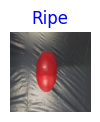

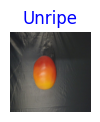

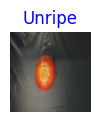

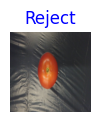

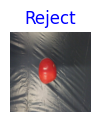

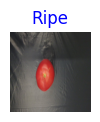

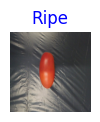

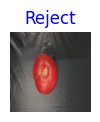

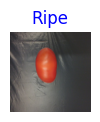

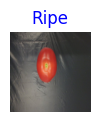

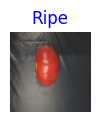

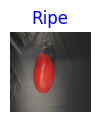

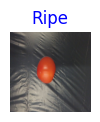

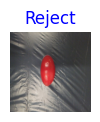

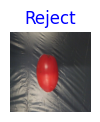

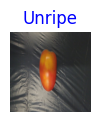

In [ ]:
for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')
    plt.show();

In [ ]:
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)


In [ ]:
# Build the model
base_model = tf.keras.applications.efficientnet.EfficientNetB7(
    include_top=False, weights='imagenet', input_shape=img_shape, pooling='max'
)

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adamax

# Define the model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(600, 600, 3)),  # Set input shape to (600, 600, 3)
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Assuming 3 output classes (ripe, unripe, reject)
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 598, 598, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 299, 299, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 297, 297, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 148, 148, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1401856)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     179,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,457,475 (684.58 MB)

 Trainable params: 179,457,475 (684.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set the number of epochs to 30
Epochs = 10

# Train the model with 30 epochs
history = model.fit(x=train_gen,
                    epochs=Epochs,
                    verbose=1,
                    validation_data=valid_gen,
                    validation_steps=None,
                    shuffle=False)



Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2157s 14s/step - accuracy: 0.5016 - loss: 2502.2126 - val_accuracy: 0.8041 - val_loss: 0.9312
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2179s 14s/step - accuracy: 0.7898 - loss: 1.0729 - val_accuracy: 0.8512 - val_loss: 0.4242
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2179s 14s/step - accuracy: 0.8559 - loss: 0.4076 - val_accuracy: 0.9174 - val_loss: 0.2136
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2183s 14s/step - accuracy: 0.8966 - loss: 0.2560 - val_accuracy: 0.9298 - val_loss: 0.1834
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2177s 14s/step - accuracy: 0.8831 - loss: 0.2755 - val_accuracy: 0.9471 - val_loss: 0.1392
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2153s 14s/step - accuracy: 0.9363 - loss: 0.1539 - val_accuracy: 0.9793 - val_loss: 0.0901
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2150s 14s/step - accuracy: 0.9582 - loss: 0.1048 - val_accuracy: 0.9636 - val_loss: 0.0886
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 2141s 14s/step - accuracy: 0.9694 - loss

In [ ]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.9743 - loss: 0.0454
16/16 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.9995 - loss: 0.0269
16/16 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.9805 - loss: 0.0415
Train Loss:  0.03212551772594452
Train Accuracy:  0.98828125
--------------------
Validation Loss:  0.030656196177005768
Validation Accuracy:  0.99609375
--------------------
Test Loss:  0.038125116378068924
Test Accuracy:  0.984375


In [ ]:
# Make predictions using the test generator
preds = model.predict(test_gen)

# Get the predicted class indices
y_pred = np.argmax(preds, axis=1)

# If you have true labels, you can also compute the accuracy or any other metrics
# true_labels = ... (Assuming you have your true labels for the test data)
# accuracy = np.sum(y_pred == true_labels) / len(true_labels)


76/76 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step


76/76 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step


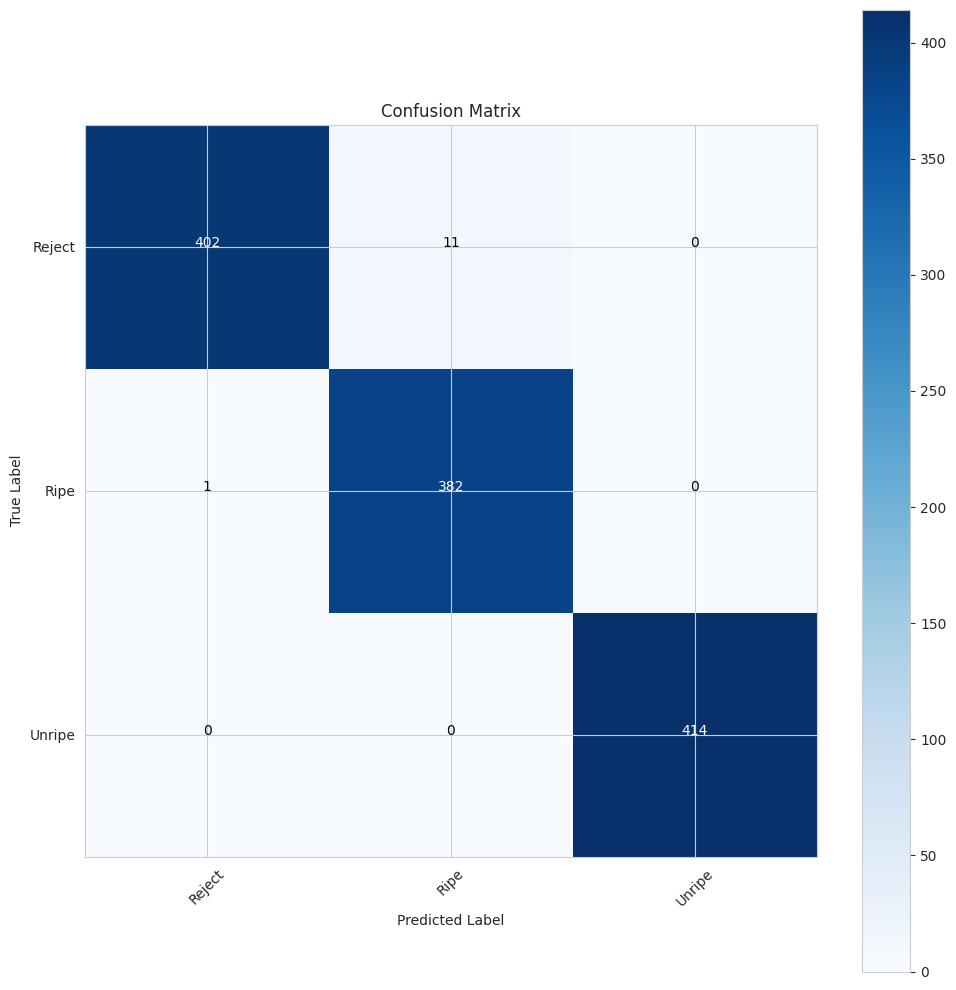

In [ ]:
# Get class indices and class names
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Generate predictions using the test generator
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

# Set up the figure for the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set tick marks
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations to each cell in the matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

# Layout adjustments
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Display the confusion matrix
plt.show()

In [ ]:
#Classification Report
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

              precision    recall  f1-score   support

      Reject       1.00      0.97      0.99       413
        Ripe       0.97      1.00      0.98       383
      Unripe       1.00      1.00      1.00       414

    accuracy                           0.99      1210
   macro avg       0.99      0.99      0.99      1210
weighted avg       0.99      0.99      0.99      1210



In [ ]:
# Save the model in .h5 format
model.save('efficientnetb7_model.h5')


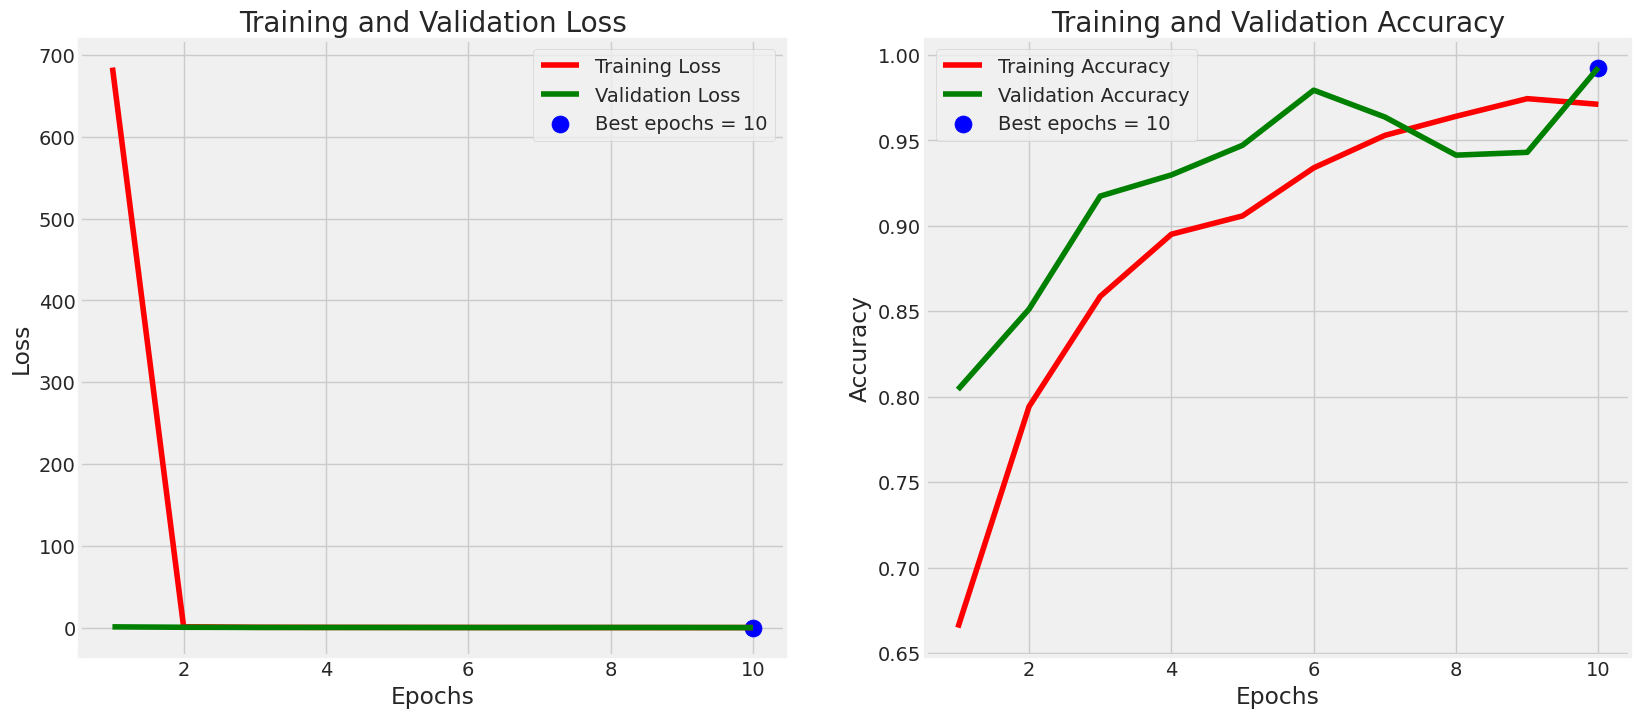

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [ ]:
# Now you can access the class names
class_names = valid_gen.class_indices.keys()
class_names = list(class_names)  # Get the class names
print("Class Names: ", class_names)

Class Names:  ['Reject', 'Ripe', 'Unripe']


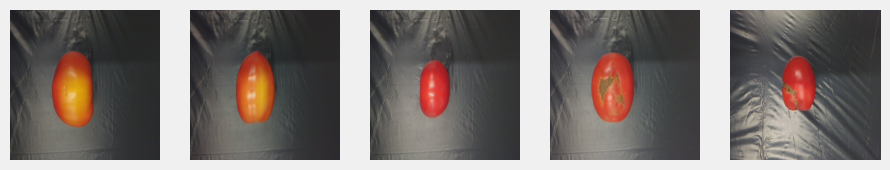

In [ ]:

# Fetch the first batch from the test generator
test_images, _ = next(test_gen)  # This fetches one batch of test images

# Get the first 5 images
first_five_images = test_images[:5]

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(first_five_images[i].astype("uint8"))  # Convert to uint8 for display
    plt.axis('off')

plt.show()

In [ ]:
# Load your trained model
cnn_model = tf.keras.models.load_model('/content/efficientnetb7_model.h5')

# Make predictions for the first 5 images
predictions = cnn_model.predict(first_five_images)
predicted_class_indices = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
# Get class names (assuming test_gen has been initialized and class_indices is available)
class_names = list(test_gen.class_indices.keys())

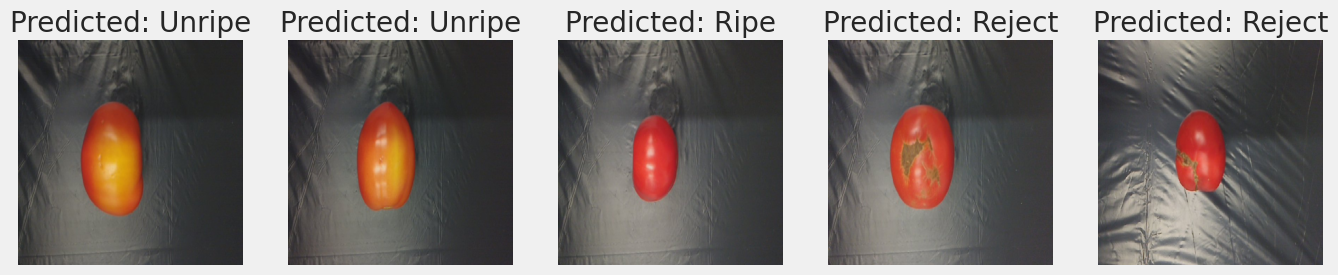

In [ ]:
# Plot the images with predicted class names
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(first_five_images[i].astype("uint8"))  # Convert to uint8 for display
    plt.title(f"Predicted: {class_names[predicted_class_indices[i]]}")
    plt.axis('off')

plt.show()